In [1]:
import socket
import sys
import binascii
import numpy as np
import matplotlib.pylab as plt
import math
import codecs

In [10]:
# Se crea el socket
sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Se conecta y se comprueba que la conexión se realizó con exito
server_address = ('192.168.0.10', 10940)
print (sys.stderr, 'connecting to %s port %s' % server_address)
try:
    sock.connect(server_address)
except socket.timeout:
    print('Error de conexion')
try:
    
    # Envio del mensaje (000EAR02 - Envio continuo de información de escaneo)
    message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(50),binascii.unhexlify(b"00"),binascii.unhexlify(b"83"),bytes([3])]
    b = bytearray()
    b.extend(map(ord, message))
    print (sys.stderr, 'sending "%s"' % b)
    sock.send(b)

    # Se recoge la respuesta (En este caso la información de lectura del láser)
    num_sens=1
    amount_received = 0
    amount_expected = 4500*num_sens
    print (sys.stderr, 'reciving "%s" bytes' % amount_expected)
    sens=""
    while amount_received < amount_expected:
        data = sock.recv(32)
        #A demas de imprimirse para ver su correcto funcionamiento se almacena en forma de cadena
        sens+= data.decode('utf-8')
        amount_received += len(data)
        print (sys.stderr, 'received "%s"' % data)
    print(len(sens))
finally:
    print (sys.stderr, 'closing socket')
    sock.close()

<ipykernel.iostream.OutStream object at 0x00000226372EABE0> connecting to 192.168.0.10 port 10940


TimeoutError: [WinError 10060] Se produjo un error durante el intento de conexión ya que la parte conectada no respondió adecuadamente tras un periodo de tiempo, o bien se produjo un error en la conexión establecida ya que el host conectado no ha podido responder

In [27]:
#Cadena con toda la información enviada por el láser
sens

NameError: name 'sens' is not defined

In [2]:
# Se separa los datos del resto de información enviada por el laser
#sensing=sens[48:4372]
sensing = '0000697408000000000066006A006A006A00660069006A006B006800680068006E006B006800670068006A0067006A006A006A006A0069006A00710071007100710071007400740070007000700073007300730073006E006E00650061006500660066006600650061006600650062006200650065005E0061006200620061005D005A005D005D005D005D0059005800580059005900580056005600580058005800570057005800560056005600520056005700570051005100520051005200520052005200520052005100520052005200500050005000520052004D004D004D004E004D004D004D00520051004E004E004E004E0052004E004B004B0049004E004F004B004B004E004E004E004F004F004F004B004B004C004C004C004B004D004D004C004C0049004D0051005100510050004C004D00510051005000500050004C004C004F0050004F004F004E004F005300530050004F005000540054005400540055004F004E00590059005B005B005B00600060006300630060006400670069006900690069006D006A006A006B006A006B006B00700070006D006C00710068006C006C006D006D006C006C0069006C0070006C006C007100710071007100710070007100750071007100710071006C006C00750075007600740074007600750075007500740075007A007A0079007C007B007C007F007F008000800080008100840082007F007F008100800080008400810084008400840089008900890086008400840086008A008A008B008C008A008B008B008B008B0086008B008300830083008900860083008300830089008900860089008B008B008C008E008E00970097009C009C009E009C009F00A400A0009D009D009C009C009C0096009A009800980098009B009F009F009F00A100A100A000A0009E009D009A009B00A000A000A0009F009F009F009F009F009D009B009B009C009D009E009E00960096009C009D009D009D009D009B009A009900950095008E008E00950095009900940092009300930095008F008F008F009000930090009100910091008B008900890089008B008E008E008E00940099009D0098009500970097009800980095009200900091009300940093008E008C008E008B008B008B008B008D0087008700870088008800800080008300830082007E007E007E007F007F008300830083008400830080007A00770077007C008300840089009100940092008E008E008E00950094008E008E008E008E008E008E008E008D008900890088008D008D008D008D008D008F008D008D008D008D008900870087008D008C008C00940095008E008D008D008E008E0091008E008D008E00940094008D008D008D008E008D008D008D008900890089008D008D008D00890088008B008B008D008D008E008E0084008D008D008D008D008D0084008300830084008D008D008D008D008D00830083008100810081007D007800780078007600750077007A007D00800083008200800082007F007C007C007C007D007D007F007D007D007C007900760076007900700073006F006F00700070006F006F006F006F006F006E006E006B006B006A0065006500650065006500620061005D00590059005900580058005800560051005100510050004B004C004C004D004D004D004D004D0051004E004E004D004D004C0051004D004C004C004C004C0050005000530056005A005A005B0065006C0071007500780078008000800080008000830083008300830083007F007F007F007D007D007D007E007F007900780079007B007B00760076007A007A007A007B0077007B007B007B0077007700750073007300730077007300780075006F006E006E00730073006F006F006F006F00730073007200720072006D006D0072007200710071007100710070006C006F0070006F0070006F006F006A006A006C006E006A006A006A006E006F006F006E006A006E006F006A006E006B006A0067006E006E006E006E006B0069006900690069006900690069006A006A006700670067006700670065006400670067006A006700670067006B00670067006600660066006600640063006A0066005F0063006300640064006400640064006400640064006400650065006400640064006400610061006400610061006500660066005F00610061006100610060006000610066006600610061006300650065006400610061005F0064006000600061006100630065006300620062005E005E005E005E0064005E005D005D005F00610061006100610061005D005C005C005B00550055005100510050005000500050005200520051004D004D004C004C004D004D004C004C004B004B004F005100500050004F005000550055005000500050005100500050005000500050004A004A0051005500550050005000500050005600560058005B005B00620062006400650065006A006A006E006F00720074007600730076007B007B007E007F007F007F007F007F007F007C007800750074007200720070006C006B006C006D006F006F006C006700670064006400640064006400650065006500650067006C006A006C0070006B006B00690067006700670067006900650064005F005F005F0060005D006000640064005D005D005D005D005D005C005D005D005F005F005F006400640064005F005F005F005F005F005D005D005D00600060006000600060005F005A005E005E005E005E005E005E005E005B005B005B005800580059005D00580057005300570058005900580059005900540053005300540054005400540055005500510051005500520050004D004D004D004F004E004D004C004D005000510050004E004B004B004C004C004D004D004A0048004A004A004A004E004A00440044004A004A00490049004400440044004400440044003F003F003F003F003B003B003B003B003C00380038003B0039003800390039003B003D003D003B003C003C003800370038003900'

In [21]:
long, substr = int(len(sensing)), int(len(sensing)/1081)
separated_data=[ [sensing[i:i+substr]] for i in range(0, long, substr) ]

In [22]:
separated_data

[['0000'],
 ['6974'],
 ['0800'],
 ['0000'],
 ['0000'],
 ['6600'],
 ['6A00'],
 ['6A00'],
 ['6A00'],
 ['6600'],
 ['6900'],
 ['6A00'],
 ['6B00'],
 ['6800'],
 ['6800'],
 ['6800'],
 ['6E00'],
 ['6B00'],
 ['6800'],
 ['6700'],
 ['6800'],
 ['6A00'],
 ['6700'],
 ['6A00'],
 ['6A00'],
 ['6A00'],
 ['6A00'],
 ['6900'],
 ['6A00'],
 ['7100'],
 ['7100'],
 ['7100'],
 ['7100'],
 ['7100'],
 ['7400'],
 ['7400'],
 ['7000'],
 ['7000'],
 ['7000'],
 ['7300'],
 ['7300'],
 ['7300'],
 ['7300'],
 ['6E00'],
 ['6E00'],
 ['6500'],
 ['6100'],
 ['6500'],
 ['6600'],
 ['6600'],
 ['6600'],
 ['6500'],
 ['6100'],
 ['6600'],
 ['6500'],
 ['6200'],
 ['6200'],
 ['6500'],
 ['6500'],
 ['5E00'],
 ['6100'],
 ['6200'],
 ['6200'],
 ['6100'],
 ['5D00'],
 ['5A00'],
 ['5D00'],
 ['5D00'],
 ['5D00'],
 ['5D00'],
 ['5900'],
 ['5800'],
 ['5800'],
 ['5900'],
 ['5900'],
 ['5800'],
 ['5600'],
 ['5600'],
 ['5800'],
 ['5800'],
 ['5800'],
 ['5700'],
 ['5700'],
 ['5800'],
 ['5600'],
 ['5600'],
 ['5600'],
 ['5200'],
 ['5600'],
 ['5700'],
 ['5700'],

In [23]:
def toDecimal(sensin):
    total=[]
    for elem in sensin:
        res=""
        for i in elem:
            t=int(i,16)
            #print(t)
            #entero= int(t[2:],0)
            if t > 0x30 and t < 0x39:
                t = t - 0x30
            elif t > 0x41 and t < 0x46:
                t = t - 0x37
            #print(t)
            binario = bin(int(t))
            #print(binario)
            res = res + str(binario)
        #print (res)
        total.append(str(int(res,2)))
    return total

In [24]:
 int('0b11001010', 2)

202

In [25]:
s=hex(ord('A'))
'int(s[2:],0)'
0xA

10

In [26]:
final=toDecimal(separated_data)
print(len(final))
#final

1081


In [27]:
def creaangulos(x, y, jump):
    while x < y:
        yield x
        x += jump

In [28]:
angulos=list(creaangulos(-45,225,270/1081))
print(len(angulos))

1081


In [38]:
cartesianos=[]
for i in range(1081):
    cartesianos.append([int(final[i]),angulos[i]])
print(cartesianos)

[[0, -45], [26996, -44.75023126734505], [2048, -44.5004625346901], [0, -44.25069380203515], [0, -44.0009250693802], [26112, -43.75115633672525], [27136, -43.5013876040703], [27136, -43.25161887141535], [27136, -43.0018501387604], [26112, -42.752081406105454], [26880, -42.502312673450504], [27136, -42.252543940795555], [27392, -42.002775208140605], [26624, -41.753006475485655], [26624, -41.503237742830706], [26624, -41.253469010175756], [28160, -41.00370027752081], [27392, -40.75393154486586], [26624, -40.50416281221091], [26368, -40.25439407955596], [26624, -40.00462534690101], [27136, -39.75485661424606], [26368, -39.50508788159111], [27136, -39.25531914893616], [27136, -39.00555041628121], [27136, -38.75578168362626], [27136, -38.50601295097131], [26880, -38.25624421831636], [27136, -38.00647548566141], [28928, -37.75670675300646], [28928, -37.50693802035151], [28928, -37.25716928769656], [28928, -37.00740055504161], [28928, -36.757631822386664], [29696, -36.507863089731714], [29696,

In [50]:
def apolares(x,y):
    c1=math.sqrt(x*x+y*y)
    if math.radians(y)>=0 and math.radians(y)<2*math.pi:
        if x > 0:
            if y >= 0:
                c2=math.atan(y/x)
            else:
                c2=math.atan(y/x)+2*math.pi
        elif x == 0:
            if y > 0:
                c2= math.pi/2
            if y < 0:
                c2= 3*math.pi/2
            if y == 0:
                c2=0
        elif x < 0:
            c2=math.atan(y/x)+math.pi
    """elif math.radians(y)> -math.pi and math.radians(y)<=math.pi:
        if x < 0:
            if y >= 0:
                c2=math.atan(y/x)+math.pi
            else:
                c2=math.atan(y/x)-math.pi
        elif x == 0:
            if y > 0:
                c2= math.pi/2
            if y < 0:
                c2= -math.pi/2
            if y == 0:
                c2=0
        elif x > 0:
            c2=math.atan(y/x)"""
    return [c1,c2]

In [51]:
polares=[]
xs=[]
ys=[]
for pun in cartesianos:
    punto=apolares(pun[0],pun[1])
    xs.append(punto[0])
    ys.append(punto[1])
    polares.append(punto)
print(polares)

UnboundLocalError: local variable 'c2' referenced before assignment

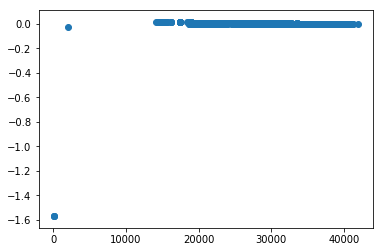

In [49]:
equis= np.array(xs)
ies=np.array(ys)
plt.scatter(equis,ies)#,angulos)
plt.show()

In [ ]:
codecs.decode(codecs.decode('E6','hex'),'ascii')

In [ ]:
message = [bytes([2]),chr(48),chr(48),chr(48),chr(69),chr(65),chr(82),chr(48),chr(49),binascii.unhexlify(b"9B"),binascii.unhexlify(b"B1"),bytes([3])]
message 
b = bytearray()
b.extend(map(ord, message))
b